<a href="https://colab.research.google.com/github/Strider2602/MLP_Notebooks/blob/main/Week_1_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wine Quality Week-1 MLP
**Lecture 1: Intoduction to the dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
def data_extract():
  data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv' #Wine Quality Dataset
  data = pd.read_csv(data_url,sep = ";")
  return data

In [ ]:
feature_list=data_extract().columns[:-1].values
label = [data_extract().columns[-1]]
print('Feature List',feature_list)
print('Label',label)

Feature List ['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']
Label ['quality']


In [ ]:
data_extract().info()

In [ ]:
data_extract().describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data_extract()['quality'].value_counts()

Text(0, 0.5, 'Count')

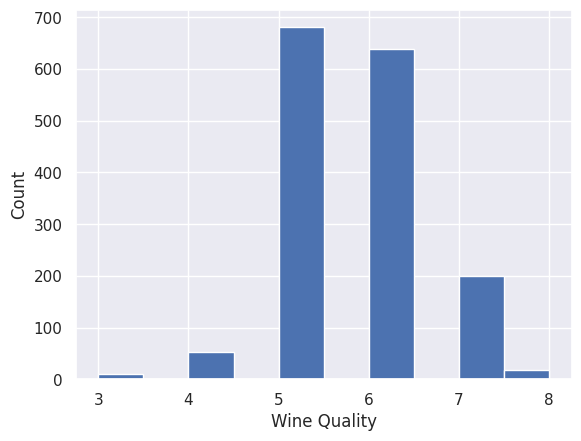

In [ ]:
sns.set()
data_extract().quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

**Here we have plotted the histogram for the Quality. We can also plot the histogram for other features such as density, pH, alcohol, etc.**

In [ ]:
from tables.tests.test_suite import test
def split_train_set(data,test_ratio):
  #set the random seed
  np.random.seed()

  #shuffle the dataset
  shuffled_indices = np.random.permutation(len(data))

  #calculate the size of the test set
  test_set_size = int(len(data)*test_ratio)

  #split the dataset into training and test sets
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[test_indices], data.iloc[train_indices]

In [ ]:
data101 = data_extract()
train_set, test_set = split_train_set(data101,0.2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#?train_test_split  # Documentation

**Let's Perform Random Sampling on our Dataset**

In [ ]:
train_set,test_set = train_test_split(data101,test_size = 0.2, random_state = 42)

**Whenever the Dataset is not uniform, we use Stratified Sampling. In this case there may be a problem with the Random Sampling as the test distribution may not match with the overall distribution**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit as sps
split = sps(n_splits = 1,test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data101, data101['quality']):
  strat_train_set = data101.loc[train_index]
  strat_test_set = data101.loc[test_index]

In [ ]:
strat_dist = strat_test_set['quality'].value_counts()/len(strat_test_set)
strat_dist

In [ ]:
overall_dist = data101['quality'].value_counts()/len(data101)
overall_dist

**Lecture 2 : Data Visualization**

<Axes: xlabel='fixed acidity', ylabel='density'>

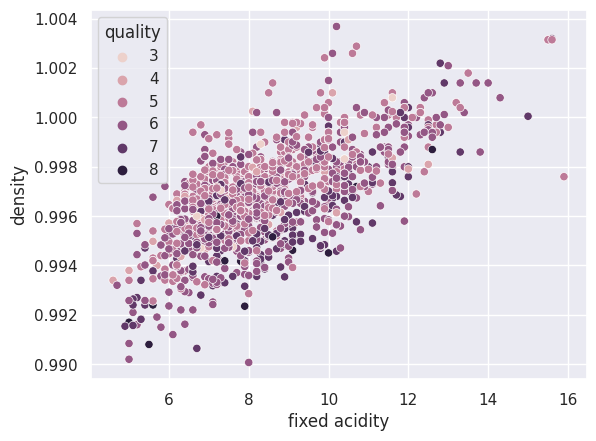

In [ ]:
sns.scatterplot(x='fixed acidity',y = 'density',hue = 'quality',data = data101)